

---



In [ ]:
! pip install scanpy
! pip install anndata

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 23.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.7/142.7 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.6/83.6 kB 1.9 MB/s eta 0:00:00
  Created wheel for session-info: filename=session_info-1.0.0-py3-none-any.whl size=8023 sha256=ac2985cac8a85f562b7601b23667b825ad71bb1d94e4568ca9d4a3ffccf39888
  Stored in directory: /root/.cache/pip/wheels/4e/56/35/a748fc57279a4b84d0b332879445fed1ad8478e7257986b015
Successfully built session-info


In [ ]:
import scanpy as sc
import numpy as np
import pandas as pd
import os
import networkx as nx
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.sparse import issparse
import matplotlib.pyplot as plt
import anndata

### Technical doublets
In droplet based single cell RNA sequencing, cells and barcoded beads are encapsulated in droplets for individual transcriptome capture. Here, capturing cells and barcodes in droplets is a stochastic process governed by poission distribution.

** P1  Complete the plot function and derive the technical doublet rate step using the poisson formula where it is defined as a droplet contains at least one bead.  

```python

def technical_doublet_rate(lam):

    return rate


lambda_values = np.linspace(0, 5, 50) # Different loading conditions
doublet_rates = [technical_doublet_rate(lam) for lam in lambda_values]

plt.figure(figsize=(5, 5))
plt.plot(lambda_values, doublet_rates, label="Technical Doublet Rate", color="r")
plt.xlabel("Average Cells per Droplet")
plt.ylabel("Technical Doublet Rate")
plt.legend()
plt.show()


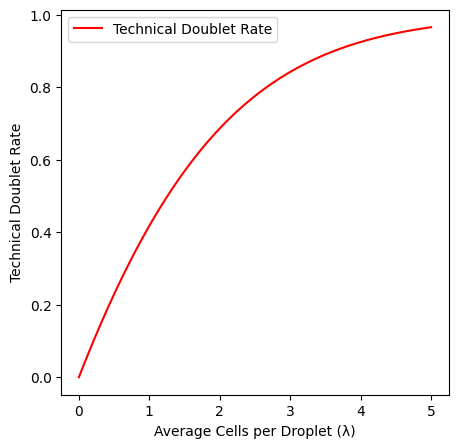

In [ ]:

def technical_doublet_rate(lam):
    """
    Computes the probability that a droplet has at least 2 beads,
    given that it has at least 1 bead, for a Poisson(lambda) distribution.
    """
    p0 = np.exp(-lam)         # P(X=0)
    p1 = lam * np.exp(-lam)   # P(X=1)

    # P(X >= 2) = 1 - P(X=0) - P(X=1)
    numerator = 1 - p0 - p1

    # P(X >= 1) = 1 - P(X=0)
    denominator = 1 - p0

    return numerator / denominator if denominator != 0 else 0

# Generate a range of lambda values (average beads per droplet)
lambda_values = np.linspace(0, 5, 50)

# Calculate technical doublet rates
doublet_rates = [technical_doublet_rate(lam) for lam in lambda_values]

# Plotting
plt.figure(figsize=(5, 5))
plt.plot(lambda_values, doublet_rates, label="Technical Doublet Rate", color="r")
plt.xlabel("Average Cells per Droplet (λ)")
plt.ylabel("Technical Doublet Rate")
plt.legend()
plt.show()

In this assignment, we will use computational method to get the technical doublets using the single cell RNA-seq data.


Data description
- Public open source dataset : GSE186078 (sample#:  ZRS06 - ZRS07)
- Illumina NovaSeq 6000 (Mus musculus)
- Data donwload : https://drive.google.com/drive/u/0/folders/15sDvdvRs8zAdkU27iLX9cy-Y1pEYm4Md
-
(download the anndata with 20166 cells × 28692 gene )  
- tutorial for anndata : https://anndata.readthedocs.io/en/stable/
- scanpy link : https://scanpy.readthedocs.io/en/stable/



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Replace with the path to your .h5ad file
h5ad_path = "./gse186078_anndata.h5ad"

# Load the dataset
adata = anndata.read_h5ad(h5ad_path)

# or equivalently
# adata = anndata.read(h5ad_path)

exp_matrix = adata.X  # shape = (n_cells, n_genes)

adata.obs.columns

/usr/local/lib/python3.11/dist-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


Index(['percent_mito', 'n_counts', 'n_genes', 'n_protein_counts', 'n_proteins',
       'leiden_totalVI_res1.4', 'leiden_totalVI_res1.0',
       'leiden_totalVI_res0.6', 'annotations_clean', 'mean_pseudotime',
       'Pseudotime_bin', 'curve1', 'curve2', 'difference', 'weight_curve1',
       'weight_curve2', 'UMIs_RNA', 'UMIs_protein', 'n_genes_pt',
       'n_proteins_pt', 'percent_mito_pt', 'Experiment', 'slingshot_clusters',
       'organism_ontology_term_id', 'development_stage_ontology_term_id',
       'disease_ontology_term_id', 'sex_ontology_term_id', 'tissue_type',
       'tissue_ontology_term_id', 'suspension_type', 'assay_ontology_term_id',
       'cell_type_ontology_term_id', 'percent_mito_pos', 'n_counts_pos',
       'n_protein_counts_pos', 'n_proteins_pos', 'batch_pos', 'n_genes_pos',
       'leiden_totalVI_res1.4_pos', 'leiden_totalVI_res1.0_pos',
       'leiden_totalVI_res0.6_pos', 'clusters_fulldata', 'leiden_CD8outlier',
       'Genotype_pos', 'is_primary_data',
       '

In [ ]:
print(type(exp_matrix))  # Check if sparse or dense


<class 'scipy.sparse._csc.csc_matrix'>


you will:
1. Construct the KNN graph with both observed and simulated cells. (use count matrix)
2. Count the number of simulated doublet neighbors  k_d(i) for each cell.
3. Calculate  q_i, the fraction of neighbors that are doublets.
4. Compute the doublet score L_i using the Bayesian formulation.
5. Compute the standard error  SE(L_i).
6. Threshold doublet scores to classify cells as singlets or doublets.

**You do not need to implement PCA or KNN from scratch**, as they are assumed to be precomputed. For neighboring computation you can use sc.pp.neighbor.

---
#### Simulating Doublets
Doublets are created by summing two randomly chosen transcriptomes:
$$ [
D_i = C_{a} + C_{b}
] $$
where Ca and Cb are randomly selected single cells.

Complete the downstream code to get predicted doublets.



In [ ]:

def simulate_doublets(exp_matrix, n_sim=2.0):
    """Simulate doublets by summing randomly chosen transcriptomes."""
    n_cells = exp_matrix.shape[0]
    n_doublets = int(n_cells * n_sim)

    # Select random pairs of cells

    # Create synthetic doublets by summing pairs

simulated_doublets, doublet_parents = simulate_doublets(exp_matrix)


In [ ]:
import numpy as np
import scipy.sparse as sp
import anndata
import scanpy as sc

# -----------------------------
# 1. Read the original data
# -----------------------------
h5ad_path = "./gse186078_anndata.h5ad"
adata_obs = anndata.read_h5ad(h5ad_path)

# Extract the expression matrix
exp_matrix = adata_obs.X  # shape = (n_cells, n_genes)

# -----------------------------
# 2. Simulate doublets
# -----------------------------
def simulate_doublets(exp_matrix, n_sim=2.0, random_state=42):
    """
    Simulate doublets by summing randomly chosen transcriptomes.
    """
    if random_state is not None:
        np.random.seed(random_state)

    n_cells = exp_matrix.shape[0]
    n_genes = exp_matrix.shape[1]
    n_doublets = int(n_cells * n_sim)

    parents = np.random.randint(low=0, high=n_cells, size=(n_doublets, 2))

    if sp.issparse(exp_matrix):
        exp_matrix_csr = exp_matrix.tocsr()
        doublets_list = []
        for i in range(n_doublets):
            idx1, idx2 = parents[i]
            doublets_list.append(exp_matrix_csr[idx1] + exp_matrix_csr[idx2])
        simulated_doublets = sp.vstack(doublets_list)
    else:
        idx1 = parents[:, 0]
        idx2 = parents[:, 1]
        simulated_doublets = exp_matrix[idx1, :] + exp_matrix[idx2, :]

    return simulated_doublets, parents

simulated_doublets, doublet_parents = simulate_doublets(exp_matrix, n_sim=2.0, random_state=42)
print("Simulated doublets shape:", simulated_doublets.shape)

# -----------------------------
# 3. Merge real and simulated cells
# -----------------------------
n_real = adata_obs.shape[0]
n_doublets = simulated_doublets.shape[0]

# If original X is sparse, keep everything in sparse format
if sp.issparse(exp_matrix):
    X_combined = sp.vstack([exp_matrix, simulated_doublets])
else:
    X_combined = np.vstack([exp_matrix, simulated_doublets])

# Create new AnnData for the combined dataset
adata_combined = anndata.AnnData(X=X_combined)

# Label the rows as either "observed" or "simulated"
adata_combined.obs["is_simulated"] = [False]*n_real + [True]*n_doublets

/usr/local/lib/python3.11/dist-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


Simulated doublets shape: (40332, 28692)


/usr/local/lib/python3.11/dist-packages/anndata/_core/storage.py:48: FutureWarning: AnnData previously had undefined behavior around matrices of type <class 'scipy.sparse._coo.coo_matrix'>.In 0.12, passing in this type will throw an error. Please convert to a supported type.Continue using for this minor version at your own risk.
  warnings.warn(msg, FutureWarning)


#### Computing Doublet Scores

After embedding both observed and simulated cells in PCA space, we calculate **doublet scores** by analyzing the **nearest neighbors** of each cell.

The doublet score for a transcriptome  i  is calculated as:

$$
q_i = \frac{k_d(i) + 1}{k_{\text{adj}} + 2}
$$

$$
L_i = \frac{q_i \cdot \hat{\rho} / r}{1 - \hat{\rho} - q_i (1 - \hat{\rho} - \hat{\rho} / r)}
$$

where:
where:

1. **$ k_d(i) $ (Doublet neighbors):** The number of simulated doublets found among the $ k_{\text{adj}} $ nearest neighbors of cell $ i $.
2. **$ k_{\text{adj}} $ (Adjusted neighbors):** The number of neighbors in the nearest neighbor graph, adjusted for the presence of simulated doublets.
3. **$ \hat{\rho} $ (Estimated doublet rate):** The fraction of observed transcriptomes predicted to be doublets.
4. **$ r $ (Simulated-to-real cell ratio):** The number of simulated doublets per real cell.

The probability $ q_i $ represents the fraction of simulated doublets among the neighbors of cell $ i $, adjusted for total neighbors. The doublet score $ L_i $ quantifies the likelihood of a transcriptome being a doublet based on Bayesian estimation.

#### Computing the Standard Error of Doublet Scores

The standard error for the doublet score  L_i  is given by:

$$
SE(L_i) =
\frac{q_i \cdot \hat{\rho} / r}{(1 - \hat{\rho} - q_i(1 - \hat{\rho} - \hat{\rho} / r))^2}
\cdot \sqrt{\left( \frac{SE(q_i)}{q_i} (1 - \hat{\rho}) \right)^2 + \left( \frac{SE(\hat{\rho})}{\hat{\rho}} (1 - q_i) \right)^2}
$$

The standard error of \( q_i \) is given by:

$$
SE(q_i) = \sqrt{\frac{q_i(1 - q_i)}{k_{\text{adj}} + 3}}
$$
$$
SE(\hat{\rho}) = \frac{\hat{\rho} (1 - \hat{\rho})}{\sqrt{N_{\text{cells}}}}
$$

where $ k_{\text{adj}}$ is the number of nearest neighbors used in the classification and $N$ is total number of observed transcriptomes used for doublet estimation.


**You can use a more optimized value for estimation with proper description.
Here you can use k (Number of nearest neighbors) = 40, r (Simulated-to-real cell ratio) = 2.0 , $ \hat{\rho} $ (Estimated doublet rate) = 0.1**



In [ ]:
  def computing_doublet_scores(k, distance_metric='euclidean'):
      """
      Classifies doublets using a nearest neighbor approach

      Parameters:
      -----------
      k : int, optional
          Number of nearest neighbors.

      distance_metric : str, optional (default='euclidean')
          Distance metric for nearest neighbor search.

      Returns:
      --------
      doublet_scores_obs_ : ndarray
          Doublet scores for observed transcriptomes.

      doublet_scores_sim_ : ndarray
          Doublet scores for simulated doublets.

      doublet_errors_obs_ : ndarray
          Standard error of doublet scores for observed transcriptomes.

      doublet_errors_sim_ : ndarray
          Standard error of doublet scores for simulated doublets.
      """

      # Combine observed and simulated transcriptomes

      # Adjust k (number of nearest neighbors) based on the ratio of simulated to observed cells
      k_adj = int(round(k * (1 + n_sim / float(n_obs))))

      # Find k_adj nearest neighbors

      # Count number of simulated and observed neighbors

      # Bayesian Estimation

      # Compute Standard Error

      return doublet_scores_obs, doublet_scores_sim,doublet_errors_obs, doublet_errors_sim




In [ ]:
#!/usr/bin/env python

import numpy as np
import scanpy as sc
import scipy.sparse as sp
import anndata
from scipy.sparse import csr_matrix
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfTransformer
import os



##############################################################################
# 1) Simulate Doublets (Vectorized)
##############################################################################

def simulate_doublets_vectorized(exp_matrix, n_sim=2.0, random_state=42):
    """Vectorized doublet simulation using sparse matrix operations"""
    np.random.seed(random_state)
    n_cells = exp_matrix.shape[0]
    n_doublets = int(n_cells * n_sim)

    # Generate parent indices using vectorized operations
    parents = np.random.choice(n_cells, size=(n_doublets, 2), replace=True)
    parents1, parents2 = parents[:, 0], parents[:, 1]

    if sp.issparse(exp_matrix):
        # Convert to CSR for efficient row indexing
        exp_matrix_csr = exp_matrix.tocsr()
        # Vectorized row summation using sparse matrix indexing
        simulated_doublets = exp_matrix_csr[parents1] + exp_matrix_csr[parents2]
    else:
        # NumPy vectorized operations for dense matrices
        simulated_doublets = exp_matrix[parents1] + exp_matrix[parents2]

    return simulated_doublets, parents

# -----------------------------
# Main Processing Pipeline
# -----------------------------

# 1. Load data
adata_obs = anndata.read_h5ad("./gse186078_anndata.h5ad")

# 2. Simulate doublets
simulated_doublets, doublet_parents = simulate_doublets_vectorized(adata_obs.X, n_sim=2.0)
print(f"Simulated doublets shape: {simulated_doublets.shape}")

# 3. Merge datasets with sparse optimization
if sp.issparse(adata_obs.X):
    X_combined = sp.vstack([adata_obs.X, simulated_doublets], format='csr')
else:
    X_combined = np.vstack([adata_obs.X, simulated_doublets])

# Create AnnData with proper typing
adata_combined = anndata.AnnData(
    X=X_combined.astype(np.float32),
    obs={'is_simulated': np.concatenate([
        np.zeros(adata_obs.n_obs, dtype=bool),
        np.ones(simulated_doublets.shape[0], dtype=bool)
    ])}
)
print(f"Combined shape: {adata_combined.shape}")

##############################################################################
# 2) Normalization & PCA (Sparse-Compatible)
##############################################################################

'''
# 1. Normalize (keeps sparse)
sc.pp.normalize_total(adata_combined, target_sum=1e4)

# 2. Log-transform with sparse optimization
adata_combined.X = adata_combined.X.log1p()  # Direct sparse operation

from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer(norm='l2', use_idf=True, smooth_idf=True)
adata_combined.X = tfidf_transformer.fit_transform(adata_combined.X)

# 3. PCA via sparse SVD
svd = TruncatedSVD(n_components=2, random_state=42)
adata_combined.obsm["X_pca"] = svd.fit_transform(adata_combined.X)
'''

# 1. Normalize Total Counts per Cell (Library Size Normalization)
# This step normalizes each cell's counts so that the total counts per cell sum to target_sum (1e4).
sc.pp.normalize_total(adata_combined, target_sum=1e4)

# 2. Log-Transform the Data with Sparse Optimization
# Instead of overwriting adata_combined.X, store the log-transformed data in a new layer.
# This preserves the normalized counts in adata_combined.X.
adata_combined.layers['log1p'] = adata_combined.X.copy()  # Create a copy of normalized data
adata_combined.layers['log1p'] = adata_combined.layers['log1p'].log1p()  # Apply log1p transformation

# 3. TF-IDF Normalization (Preserves Sparsity)
# Apply TF-IDF normalization on the log-transformed data and store it in another layer.
tfidf_transformer = TfidfTransformer(norm='l2', use_idf=True, smooth_idf=True)

# Ensure the data is in CSR format for efficient processing
if not isinstance(adata_combined.layers['log1p'], csr_matrix):
    adata_combined.layers['log1p'] = csr_matrix(adata_combined.layers['log1p'])

# Fit and transform the log-transformed data
adata_combined.layers['tfidf'] = tfidf_transformer.fit_transform(adata_combined.layers['log1p'])

# 4. PCA via Sparse SVD on TF-IDF Normalized Data
# Perform PCA on the TF-IDF normalized data stored in the 'tfidf' layer.
# Store the PCA results in obsm["X_pca"] without altering the original X matrix.
svd = TruncatedSVD(n_components=2, random_state=42)
adata_combined.obsm["X_pca"] = svd.fit_transform(adata_combined.layers['tfidf'])

##############################################################################
# 3) KNN Graph Construction
##############################################################################

# Calculate adjusted k for Bayesian approach
k = 40  # Base neighbor count
n_obs = adata_obs.n_obs  # Number of real cells
n_sim = simulated_doublets.shape[0]  # Number of simulated cells
r = n_sim / n_obs  # Simulated-to-real ratio
k_adj = int(round(k * (1 + r)))

print(f"Adjusted neighbors: {k_adj} (base k={k}, ratio r={r:.2f})")

# Build KNN graph using PCA coordinates
sc.pp.neighbors(
    adata_combined,
    n_neighbors=k_adj + 1,  # Add 1 to ensure k_adj neighbors after self-removal
    use_rep='X_pca',
    metric='euclidean',
    random_state=42
)

print("KNN graph constructed successfully.")

/usr/local/lib/python3.11/dist-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


Simulated doublets shape: (40332, 28692)
Combined shape: (60498, 28692)
Adjusted neighbors: 120 (base k=40, ratio r=2.00)
KNN graph constructed successfully.


Extracted neighbor indices for 60498 cells.

Computing doublet scores...
Scores stored in adata_combined.obs['doublet_score']



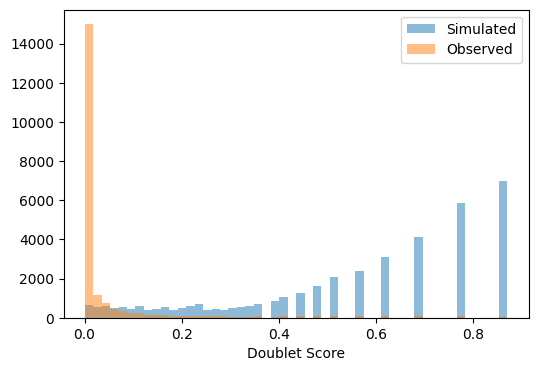

Threshold: 0.8705
Predicted doublets: 7031
Total real cells: 20166
Real cells predicted as doublets: 42
Real singlets retained: 20124

Total simulated cells: 40332
Simulated doublets predicted as doublets: 6989
Simulated cells retained: 33343

Final singlet_adata shape: (20124, 28692)


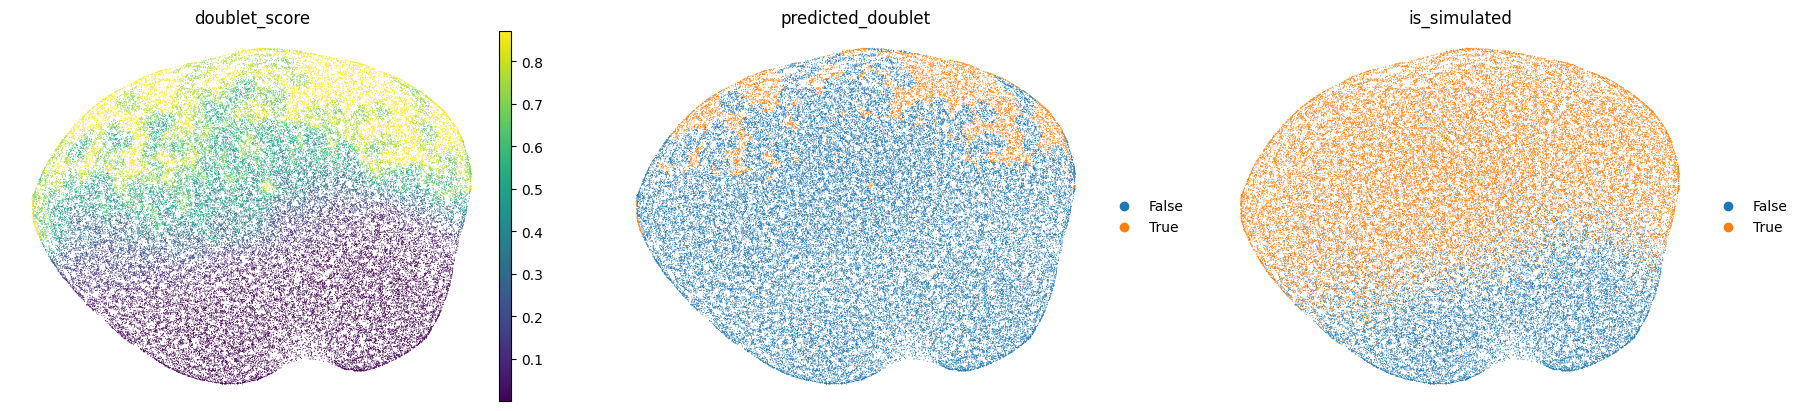

In [ ]:


##############################################################################
# 4) Extract neighbor indices from the CSR distance matrix
##############################################################################
def extract_neighbor_indices_from_csr(distance_csr):
    """
    Given a CSR distance matrix from Scanpy neighbors,
    return a list of neighbor index arrays for each cell.
    """
    n_cells = distance_csr.shape[0]
    indices_list = []

    for i in range(n_cells):
        start_idx = distance_csr.indptr[i]
        end_idx   = distance_csr.indptr[i+1]
        neighbors_i = distance_csr.indices[start_idx:end_idx]
        indices_list.append(neighbors_i)
    return indices_list

distance_csr = adata_combined.obsp['distances']  # Get from Scanpy neighbors
indices_list = extract_neighbor_indices_from_csr(distance_csr)

# Remove self-hits and truncate to k_adj neighbors
for i in range(len(indices_list)):
    nn_i = indices_list[i]
    nn_i = nn_i[nn_i != i]  # Remove self
    indices_list[i] = nn_i[:k_adj]  # Keep only k_adj neighbors

print(f"Extracted neighbor indices for {len(indices_list)} cells.\n")

##############################################################################
# 5) Compute Bayesian doublet scores
##############################################################################
# Define rho
rho = 0.1  # Estimated doublet rate

def compute_doublet_scores_from_graph(adata, neighbor_indices, k_adj, r, rho):
    """Bayesian doublet scoring implementation"""
    is_sim_array = adata.obs['is_simulated'].values
    n_cells = adata.n_obs
    k_d = np.zeros(n_cells, dtype=int)

    for i in range(n_cells):
        nn_i = neighbor_indices[i]
        k_d[i] = np.sum(is_sim_array[nn_i])

    q_array = (k_d + 1) / (k_adj + 2)
    numerator = q_array * (rho / r)
    denominator = 1.0 - rho - q_array * (1.0 - rho - (rho / r))
    L_array = numerator / denominator
    return L_array, q_array

print("Computing doublet scores...")
L_array, q_array = compute_doublet_scores_from_graph(
    adata_combined,
    neighbor_indices=indices_list,
    k_adj=k_adj,
    r=r,
    rho=rho
)
adata_combined.obs['doublet_score'] = L_array
adata_combined.obs['q_value'] = q_array
print("Scores stored in adata_combined.obs['doublet_score']\n")

##############################################################################
# 6) Visualization and Doublet Removal
##############################################################################
# Plot histogram
is_sim = adata_combined.obs['is_simulated']
scores_sim = adata_combined.obs.loc[is_sim, 'doublet_score']
scores_obs = adata_combined.obs.loc[~is_sim, 'doublet_score']

plt.figure(figsize=(6,4))
plt.hist(scores_sim, bins=50, alpha=0.5, label="Simulated")
plt.hist(scores_obs, bins=50, alpha=0.5, label="Observed")
plt.xlabel("Doublet Score")
plt.legend()
plt.show()

# Apply 95th percentile threshold
threshold_95 = np.percentile(scores_sim, 95)
adata_combined.obs['predicted_doublet'] = adata_combined.obs['doublet_score'] >= threshold_95

print(f"Threshold: {threshold_95:.4f}")
print(f"Predicted doublets: {adata_combined.obs['predicted_doublet'].sum()}")

# Define masks FIRST
real_doublet_mask = (~adata_combined.obs['is_simulated']) & adata_combined.obs['predicted_doublet']
sim_doublet_mask = adata_combined.obs['is_simulated'] & adata_combined.obs['predicted_doublet']

# Now calculate counts
n_real = (~adata_combined.obs['is_simulated']).sum()
n_sim = adata_combined.obs['is_simulated'].sum()

n_real_predicted_doublets = real_doublet_mask.sum()
n_real_singlets_retained = (~adata_combined.obs['is_simulated'] & ~adata_combined.obs['predicted_doublet']).sum()

n_sim_predicted_doublets = sim_doublet_mask.sum()
n_sim_retained = (adata_combined.obs['is_simulated'] & ~adata_combined.obs['predicted_doublet']).sum()

print(f"Total real cells: {n_real}")
print(f"Real cells predicted as doublets: {n_real_predicted_doublets}")
print(f"Real singlets retained: {n_real_singlets_retained}\n")

print(f"Total simulated cells: {n_sim}")
print(f"Simulated doublets predicted as doublets: {n_sim_predicted_doublets}")
print(f"Simulated cells retained: {n_sim_retained}\n")

# Create final dataset (only real singlets)
singlet_adata = adata_combined[
    (~adata_combined.obs['predicted_doublet']) &
    (~adata_combined.obs['is_simulated'])
].copy()
print(f"Final singlet_adata shape: {singlet_adata.shape}")

##############################################################################
# 7) UMAP Visualization
##############################################################################
sc.tl.umap(adata_combined)
sc.pl.umap(
    adata_combined,
    color=["doublet_score", "predicted_doublet", "is_simulated"],  # Add 'cell_type' if available
    ncols=3,
    frameon=False
)


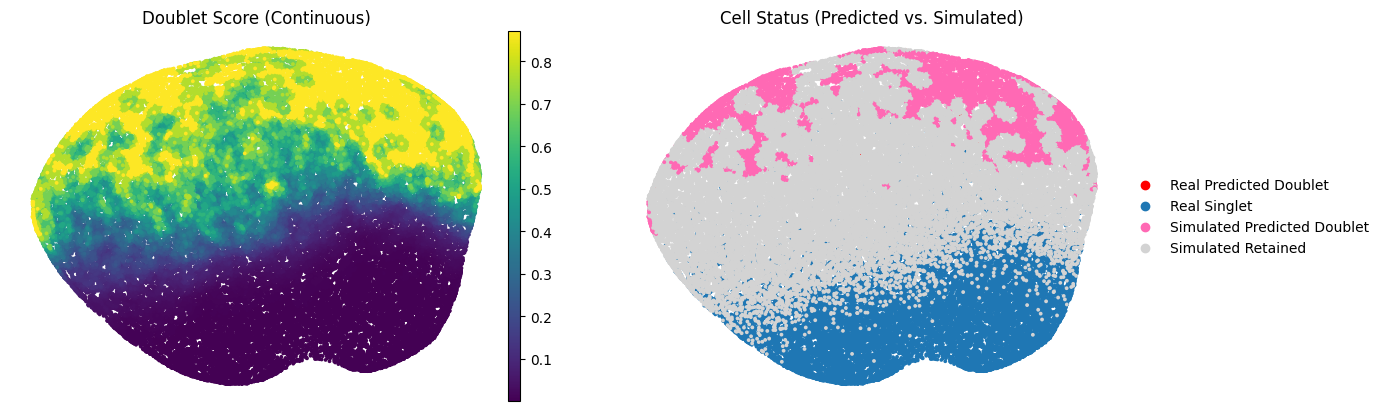

In [ ]:
##############################################################################
# Enhanced UMAP Visualization
##############################################################################

# Create a combined category column
adata_combined.obs['cell_status'] = np.select(
    condlist=[
        # Order matters - check most specific cases first
        (~adata_combined.obs['is_simulated']) & adata_combined.obs['predicted_doublet'],
        adata_combined.obs['is_simulated'] & adata_combined.obs['predicted_doublet'],
        adata_combined.obs['is_simulated'],
        ~adata_combined.obs['is_simulated']
    ],
    choicelist=[
        'Real Predicted Doublet',
        'Simulated Predicted Doublet',
        'Simulated Retained',
        'Real Singlet'
    ],
    default='Unknown'
)

# Create custom color palette
status_palette = {
    'Real Predicted Doublet': '#ff0000',  # Red
    'Simulated Predicted Doublet': '#ff69b4',  # Pink
    'Real Singlet': '#1f77b4',  # Blue
    'Simulated Retained': '#d3d3d3'  # Light gray
}

# Plot enhanced UMAP
sc.pl.umap(
    adata_combined,
    color=["doublet_score", "cell_status"],
    palette=status_palette,
    ncols=2,
    size=30,
    frameon=False,
    title=[
        "Doublet Score (Continuous)",
        "Cell Status (Predicted vs. Simulated)"
    ]
)

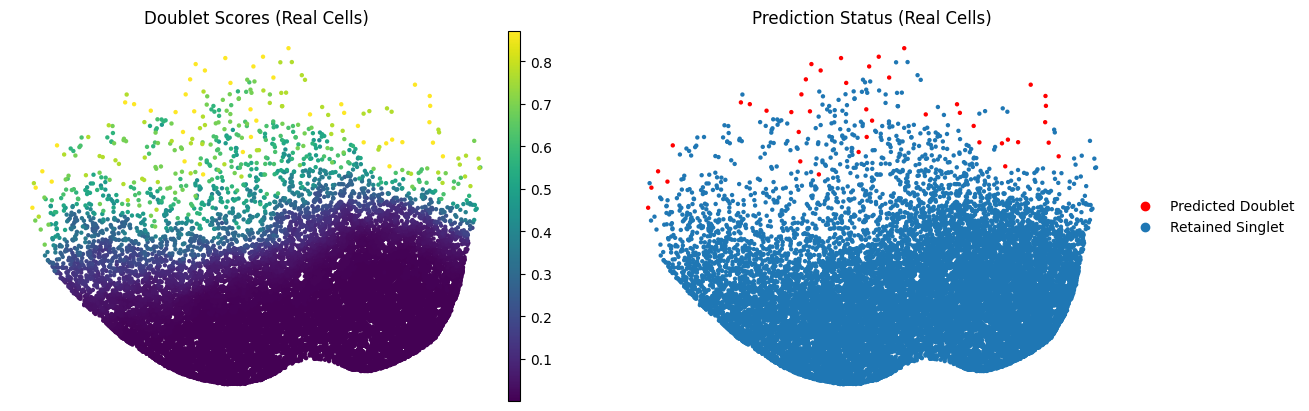

In [ ]:
##############################################################################
# UMAP of Real Cells Only
##############################################################################

# Subset to real cells
real_adata = adata_combined[~adata_combined.obs['is_simulated']].copy()

# Create simplified cell status
real_adata.obs['real_cell_status'] = np.where(
    real_adata.obs['predicted_doublet'],
    'Predicted Doublet',
    'Retained Singlet'
)

# Plot (using existing UMAP coordinates)
sc.pl.umap(
    real_adata,
    color=["doublet_score", "real_cell_status"],
    palette={
        'Predicted Doublet': '#ff0000',  # Red
        'Retained Singlet': '#1f77b4'    # Blue
    },
    ncols=2,
    size=40,
    frameon=False,
    title=[
        "Doublet Scores (Real Cells)",
        "Prediction Status (Real Cells)"
    ]
)

In [ ]:
##############################################################################
# 9) Report Doublet Rates by Cell Type
##############################################################################

if 'cell_type' in adata_obs.obs.columns:
    # Transfer cell type annotations to combined adata (real cells only)
    adata_combined.obs['cell_type'] = np.nan
    adata_combined.obs.loc[~adata_combined.obs['is_simulated'], 'cell_type'] = adata_obs.obs['cell_type'].values

    # Get simulated doublet scores for threshold calculation
    sim_scores = adata_combined.obs.loc[adata_combined.obs['is_simulated'], 'doublet_score']

    # Calculate rates at different percentiles
    for percentile in [90, 95, 99]:
        # Get threshold from simulated scores
        threshold = np.percentile(sim_scores, percentile)

        # Create temporary prediction column
        adata_combined.obs[f'temp_pred_{percentile}'] = (
            adata_combined.obs['doublet_score'] >= threshold
        )

        # Calculate doublet rates by cell type (real cells only)
        real_cells_mask = ~adata_combined.obs['is_simulated']
        ct_rates = (
            adata_combined[real_cells_mask]
            .obs.groupby('cell_type', observed=True)[f'temp_pred_{percentile}']
            .mean()
            .sort_values(ascending=False)
            .round(4) * 100  # Convert to percentage
        )

        print(f"\nCell Type Doublet Rates at {percentile}th Percentile (Threshold={threshold:.2f}):")
        print(ct_rates.to_string())
        print(f"\nMedian doublet rate across cell types: {ct_rates.median():.1f}%")

        # Cleanup temporary column
        del adata_combined.obs[f'temp_pred_{percentile}']
else:
    print("No 'cell_type' column found in original data - skipping cell type reporting")


Cell Type Doublet Rates at 90th Percentile (Threshold=0.87):
cell_type
CD8-positive, alpha-beta thymocyte       0.48
CD4-positive, alpha-beta thymocyte       0.31
mature CD8 single-positive thymocyte     0.31
mature CD4 single-positive thymocyte     0.08
double-positive, alpha-beta thymocyte    0.07
leukocyte                                0.00

Median doublet rate across cell types: 0.2%

Cell Type Doublet Rates at 95th Percentile (Threshold=0.87):
cell_type
CD8-positive, alpha-beta thymocyte       0.48
CD4-positive, alpha-beta thymocyte       0.31
mature CD8 single-positive thymocyte     0.31
mature CD4 single-positive thymocyte     0.08
double-positive, alpha-beta thymocyte    0.07
leukocyte                                0.00

Median doublet rate across cell types: 0.2%

Cell Type Doublet Rates at 99th Percentile (Threshold=0.87):
cell_type
CD8-positive, alpha-beta thymocyte       0.48
CD4-positive, alpha-beta thymocyte       0.31
mature CD8 single-positive thymocyte     0.31
matu

<ipython-input-10-ffe15ff0ee64>:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '['CD4-positive, alpha-beta thymocyte', 'mature CD4 single-positive thymocyte', 'double-positive, alpha-beta thymocyte', 'double-positive, alpha-beta thymocyte', 'mature CD4 single-positive thymocyte', ..., 'double-positive, alpha-beta thymocyte', 'double-positive, alpha-beta thymocyte', 'mature CD4 single-positive thymocyte', 'CD8-positive, alpha-beta thymocyte', 'double-positive, alpha-beta thymocyte']
Length: 20166
Categories (6, object): ['double-positive, alpha-beta thymocyte', 'leukocyte', 'CD8-positive, alpha-beta thymocyte',
                         'mature CD4 single-positive thymocyte', 'mature CD8 single-positive thymocyte',
                         'CD4-positive, alpha-beta thymocyte']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  adata_combined.obs.loc[~adata_combined

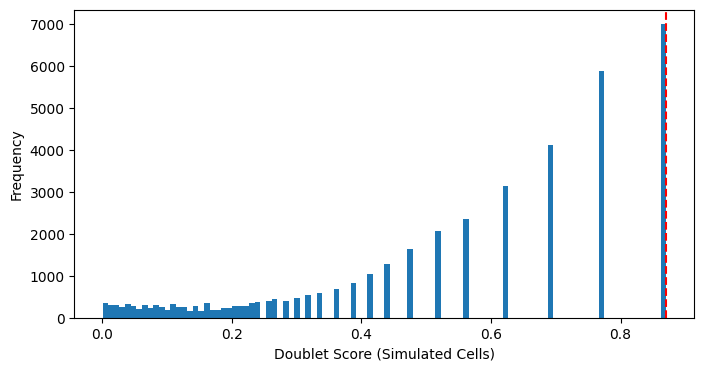

In [ ]:
plt.figure(figsize=(8, 4))
plt.hist(adata_combined.obs.loc[is_sim, 'doublet_score'], bins=100)
plt.axvline(threshold_95, color='r', linestyle='--', label='95th percentile')
plt.xlabel("Doublet Score (Simulated Cells)")
plt.ylabel("Frequency")
plt.show()

#####1.Plot a histogram of doublet scores to determine an appropriate threshold for doublet filtering.
#####2.Select the 95th percentile of simulated doublets as the threshold for filtering doublets.
#####3.Remove doublets and report the number of remaining singlet cells in the dataset and discuss about the report.
#####4.Use scanpy.tl.umap to visualize the data and mark the estimated doublets in the plot.
#####5. Report the doublet rate from each cell types with 90, 95, 99th threshold.
#####6. What happens if you change the threshold to 90th percentile or 99th percentile?

# Response to Questions 1-6

1. Histogram plotted above, suggested threshold for doublet filtering 🇰

2. Code implemented above

3.

```
Total real cells: 20166
Real cells predicted as doublets: 42
Real singlets retained: 20124
```

.2% of real cells were predicted as doublets and removed when a 95th percentile threshold is use as the filter.

4. Umap plots are coded and show above

5. Median doublet rate across cell types: 0.2%

```
Cell Type Doublet Rates at 90th Percentile (Threshold=0.87):
cell_type
CD8-positive, alpha-beta thymocyte       0.48
CD4-positive, alpha-beta thymocyte       0.31
mature CD8 single-positive thymocyte     0.31
mature CD4 single-positive thymocyte     0.08
double-positive, alpha-beta thymocyte    0.07
leukocyte                                0.00



Cell Type Doublet Rates at 95th Percentile (Threshold=0.87):
cell_type
CD8-positive, alpha-beta thymocyte       0.48
CD4-positive, alpha-beta thymocyte       0.31
mature CD8 single-positive thymocyte     0.31
mature CD4 single-positive thymocyte     0.08
double-positive, alpha-beta thymocyte    0.07
leukocyte                                0.00


Cell Type Doublet Rates at 99th Percentile (Threshold=0.87):
cell_type
CD8-positive, alpha-beta thymocyte       0.48
CD4-positive, alpha-beta thymocyte       0.31
mature CD8 single-positive thymocyte     0.31
mature CD4 single-positive thymocyte     0.08
double-positive, alpha-beta thymocyte    0.07
leukocyte
```
6. The number of filtered out real cells remains the same across a 90 - 99th percentile threshold due to heavily right skewed simulated doublet scores.



# Further Discussion on Doublet Detection Thresholds
### 1. Limitations of Current Simulation Method
Our doublet simulation approach creates an artificial concentration of doublet scores around 0.87. This makes it difficult to distinguish real biological doublets, as many true doublets likely fall below this score threshold. Consequently:

Raising the threshold (e.g., 90% → 99%) has no impact on predicted doublet rates across cell types.

The 0.87 cutoff remains a rigid "wall" that real cells rarely surpass, limiting sensitivity.

### 2. Spatial Patterns in UMAP Visualizations

Real cells flagged as doublets cluster in distinct regions, far from non-doublet populations.

Simulated doublets show unnaturally uniform behavior, with nearly all scoring near 0.87 (visible in graphs).

Concern: Some real cells overlapping with simulated doublet regions are not flagged as doublets, suggesting:

Thresholds may need to be lowered to capture these.

Simulations should better mimic biology (e.g., add noise, pair cells from the same lineage, or lower threshold based on histogram).

### 3. Current Filtering Outcome
Only 0.2% of cells (extremely high-scoring outliers) are removed with the 0.87 threshold. This is likely too conservative.

### 4. Proposed Improvements

Adjust thresholds using the histogram: Target regions where few real cells overlap with dense simulated doublet populations (e.g., lower score ranges).

Aim to remove 1–10% of data, focusing on "low-risk" zones where real cells are sparse but simulated doublets are abundant.


### Summary
The current rigid threshold (0.87) fails to capture most true doublets. Lowering the doublet score threshold—guided by histogram patterns could balance specificity and sensitivity while minimizing real-cell loss.

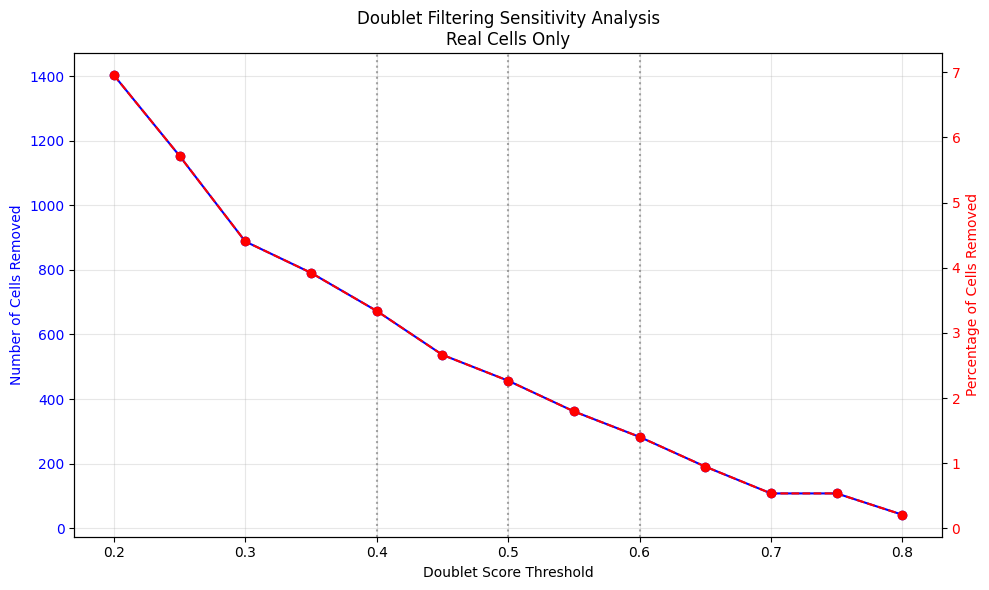

Threshold  | Cells Removed | % Removed 
--------------------------------------------
0.20      | 1403         | 7.0%
0.25      | 1153         | 5.7%
0.30      | 888          | 4.4%
0.35      | 791          | 3.9%
0.40      | 673          | 3.3%
0.45      | 537          | 2.7%
0.50      | 457          | 2.3%
0.55      | 362          | 1.8%
0.60      | 283          | 1.4%
0.65      | 191          | 0.9%
0.70      | 108          | 0.5%
0.75      | 108          | 0.5%
0.80      | 42           | 0.2%


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

##############################################################################
# Threshold Sensitivity Analysis
##############################################################################

# Get real cells' doublet scores
real_scores = adata_combined.obs.loc[~adata_combined.obs['is_simulated'], 'doublet_score']
n_real = len(real_scores)

# Generate threshold range
thresholds = np.arange(0.20, 0.81, 0.05)
removed_counts = [np.sum(real_scores >= t) for t in thresholds]
removed_percent = [c/n_real*100 for c in removed_counts]

# Create plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for counts
ax1.plot(thresholds, removed_counts, 'b-o', label='Cells Removed')
ax1.set_xlabel('Doublet Score Threshold')
ax1.set_ylabel('Number of Cells Removed', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.grid(True, alpha=0.3)

# Create second y-axis for percentages
ax2 = ax1.twinx()
ax2.plot(thresholds, removed_percent, 'r--o', label='% Removed')
ax2.set_ylabel('Percentage of Cells Removed', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Add markers for common thresholds
for t in [0.4, 0.5, 0.6]:
    ax1.axvline(t, color='gray', linestyle=':', alpha=0.7)

plt.title('Doublet Filtering Sensitivity Analysis\nReal Cells Only')
fig.tight_layout()
plt.show()

# Print table of key thresholds
print(f"{'Threshold':<10} | {'Cells Removed':<12} | {'% Removed':<10}")
print("--------------------------------------------")
for t, count, pct in zip(thresholds, removed_counts, removed_percent):
    print(f"{t:.2f}      | {count:<12} | {pct:.1f}%")

After looking at our histogram of doulbet scores, and compting the number real cells removed at 90th - 99th precentile, we narrowed down the selection of threshold to be within the range of .2 - .6. The number of cells removed based on threshold levels out slightly once we pass the ~.25 threshold, so lets select something a little bit after the .3 threshold (for this study lets say .4)

In [ ]:
### Generate filtered data based on the observed values in the histogram plotted

## Threshold == .4

##############################################################################
# Filter and Save Real Cells with Doublet Threshold
##############################################################################

# Define threshold
DOUBLET_THRESHOLD = 0.4

# Get real cells mask
real_cells_mask = ~adata_combined.obs['is_simulated']

# Get real cells doublet scores
real_scores = adata_combined.obs.loc[real_cells_mask, 'doublet_score']

# Calculate filtering stats
n_real_total = real_scores.shape[0]
n_removed = (real_scores >= DOUBLET_THRESHOLD).sum()
n_retained = n_real_total - n_removed

# Create filtered dataset (real cells below threshold)
singlet_adata = adata_combined[real_cells_mask & (adata_combined.obs['doublet_score'] < DOUBLET_THRESHOLD)].copy()

# Optional: Create removed cells dataset
doublet_adata = adata_combined[real_cells_mask & (adata_combined.obs['doublet_score'] >= DOUBLET_THRESHOLD)].copy()

# Print report
print(
    f"Doublet Filtering Report (Threshold={DOUBLET_THRESHOLD}):\n"
    f"=====================================================\n"
    f"Total real cells: {n_real_total}\n"
    f"Cells removed: {n_removed} ({n_removed/n_real_total:.1%})\n"
    f"Cells retained: {n_retained} ({n_retained/n_real_total:.1%})\n"
)


Doublet Filtering Report (Threshold=0.4):
Total real cells: 20166
Cells removed: 673 (3.3%)
Cells retained: 19493 (96.7%)



In [ ]:
# Save results
if not isinstance(singlet_adata.X, csr_matrix):
    singlet_adata.X = csr_matrix(singlet_adata.X)

singlet_adata.write("drive/MyDrive/filtered_singlets_threshold_0.4.h5ad")
doublet_adata.write("drive/MyDrive/removed_potential_doublets_0.4.h5ad")

print("Filtered datasets saved:")
print(f"- Singlets: filtered_singlets_threshold_0.4.h5ad ({singlet_adata.n_obs} cells)")
print(f"- Removed: removed_potential_doublets_0.4.h5ad ({doublet_adata.n_obs} cells)")

Filtered datasets saved:
- Singlets: filtered_singlets_threshold_0.4.h5ad (19493 cells)
- Removed: removed_potential_doublets_0.4.h5ad (673 cells)


## WCGNA Analysis on single cell data

You will :  

1. Load the doublets filtered data from previous step.
2. Keep genes that have at least 200 counts or are expressed in at least 3 cells. Using the meta data, generate the 2 cases of scenario where,
S1: Mature CD4, Immature CD4 / S2: Mature CD8, Immature CD8
Use 'annotations_clean' column from .obs data.
3. Extract 2K highly variable genes from gene expression matrix.
4. Check the log-normalization on gene expression data matrix.
5. Compute the correlation matrix and convert correlations into adjacency matrix. (soft-thresholding power function).
6. Optimize the soft-thresholding power parameter
7. For the Topological Analysis, compute the clustering coefficient.
8. Compute the Topological overlap measure (TOM) and perform hierarchical clustering using Dissimilarity (1-TOM value)  information.
9. Identify the gene module.


#### **Correlation & Adjacency Matrix**
The Pearson correlation between genes \( i \) and \( j \) is:

$$
s_{ij} = \frac{\sum_{k} (x_{ik} - \bar{x}_i)(x_{jk} - \bar{x}_j)}
{\sqrt{\sum_{k} (x_{ik} - \bar{x}_i)^2} \cdot \sqrt{\sum_{k} (x_{jk} - \bar{x}_j)^2}}
$$

where:
- $ x_{ik} $ (Gene expression level): The expression level of gene $ i $ in cell $ k $.  
- $ \bar{x}_i $ (Mean gene expression): The average expression of gene $ i $ across all cells.  

#### **Correlations into an Adjacency Matrix**
We use a soft-thresholding power function:

$$
a_{ij} = |s_{ij}|^\beta
$$

where$\beta$ is chosen to maximize scale-free topology.

#### $\beta$  using the Scale-Free Criterion
1. Test different $\beta$  values (1-20).
2. Select the best $\beta$ where median connectivity stabilizes while maintaining network sparsity.

---
#### **Clustering Coefficient**
The clustering coefficient of a gene measures how connected its neighbors are:

$$
C_i = \frac{2T_i}{k_i (k_i - 1)}
$$

where:
- $k_i$ is the number of neighbors of gene  $i$.
- $T_i$ is the number of triangles (closed loops).

#### **Topological Overlap Measure (TOM)**
TOM measures how similar the neighborhoods of two genes are:

$$
TOM_{ij} = \frac{L_{ij} + a_{ij}}{\min(k_i, k_j) + 1 - a_{ij}}
$$

where:
- $L_{ij}$ is the number of shared neighbors between genes $i$ and $j$.
- $a_{ij}$ is the adjacency value.


#### **TOM similarity matrix into a dissimilarity matrix**:

  $$
  D_{ij} = 1 - TOM_{ij}
  $$




In [ ]:
##############################################################################
# 8) Gene Filtering and Scenario Analysis

'''
From the real cells that were filtered before, we now select from this group the ones that have counts >200 or in more than 3 cells for WCGNA analysis
'''
##############################################################################

# 1. Get filtered cell indices from original data
n_obs = adata_obs.n_obs
filter_mask = adata_combined.obs['doublet_score'][:n_obs] < DOUBLET_THRESHOLD

# 2. Create filtered original dataset
filtered_adata = adata_obs[filter_mask].copy()

# 3. Calculate gene statistics on ORIGINAL COUNTS
gene_counts = filtered_adata.X.sum(axis=0).A1 if sp.issparse(filtered_adata.X) else filtered_adata.X.sum(axis=0)
gene_cells = (filtered_adata.X > 0).sum(axis=0).A1 if sp.issparse(filtered_adata.X) else (filtered_adata.X > 0).sum(axis=0)

# 4. Create gene filter
gene_filter = (gene_counts >= 200) | (gene_cells >= 3)
filtered_adata = filtered_adata[:, gene_filter]

print(f"\nFiltered data: {filtered_adata.n_obs} cells, {filtered_adata.n_vars} genes" )

# 5. Create scenario subsets
def create_scenario_subset(adata, mature_pattern, immature_pattern):
    mature_mask = adata.obs['annotations_clean'].str.contains(mature_pattern)
    immature_mask = adata.obs['annotations_clean'].str.contains(immature_pattern)
    return adata[mature_mask | immature_mask].copy()

# Scenario 1: Mature CD4 vs Immature CD4
s1_adata = create_scenario_subset(
    filtered_adata,
    mature_pattern='Mature CD4',
    immature_pattern='Immature CD4'
)

# Scenario 2: Mature CD8 vs Immature CD8
s2_adata = create_scenario_subset(
    filtered_adata,
    mature_pattern='Mature CD8',
    immature_pattern='Immature CD8'
)

print(f"\nScenario Subsets:")
print(f"S1 (CD4): {s1_adata.n_obs} cells, {s1_adata.n_vars} genes")
print(f"S2 (CD8): {s2_adata.n_obs} cells, {s2_adata.n_vars} genes")

# 6. Save filtered datasets

filtered_adata.write("drive/MyDrive/filtered_original_counts.h5ad")
s1_adata.write("drive/MyDrive/scenario1_cd4_subset.h5ad")
s2_adata.write("drive/MyDrive/scenario2_cd8_subset.h5ad")


/usr/local/lib/python3.11/dist-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


Filtered data: 19493 cells, 15140 genes

Scenario Subsets:
S1 (CD4): 7885 cells, 15140 genes
S2 (CD8): 5208 cells, 15140 genes


In [ ]:
import scanpy as sc
import numpy as np
import pandas as pd
import os
import networkx as nx
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.sparse import issparse

class WGCNAPipeline:
    def __init__(self, adata_path):
        self.adata = sc.read_h5ad(adata_path)
        self.adata_cd4 = None
        self.adata_cd8 = None
        self.modules_cd4 = None
        self.modules_cd8 = None
        self.TOM_cd4 = None
        self.TOM_cd8 = None

    def preprocess_data(self):
        #sc.pp. preprocessing and filtering


    def identify_hvg(self):

    def log_normalization(self):

    def compute_correlation_matrix(self, data):
        return

    def compute_adjacency_matrix(self, matrix, power):
        return

    def calculate_clustering_coefficient(self, matrix2):
         return C

    def filter_by_clustering(self, adjacency_mtx, min_clustering_percentile=10):
        C = self.calculate_clustering_coefficient(adjacency_mtx)
        threshold = np.percentile(C, min_clustering_percentile)
        keep_genes = C >= threshold
        return adjacency_mtx[keep_genes][:, keep_genes], keep_genes

    def compute_tom(self, matrix2):
        return

    def perform_clustering(self):
      # The number of clusters should not be equivalent to the number of genes in the correlation matrix.
      #

    def compute_hub_genes(self, adjacency_matrix, gene_names):
        G = nx.from_numpy_array(adjacency_matrix, create_using=nx.Graph())
        mapping = dict(zip(range(len(gene_names)), gene_names))
        G = nx.relabel_nodes(G, mapping)
        degree_centrality = nx.degree_centrality(G)
        return sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)

    def run_pipeline(self):

# Run the pipeline
pipeline = WGCNAPipeline("filtered_data.h5ad")
pipeline.run_pipeline()

IndentationError: expected an indented block after function definition on line 20 (<ipython-input-1-80b17b5a015f>, line 24)

In [ ]:
! pip install dynamicTreeCut


  Preparing metadata (setup.py) ... done
  Created wheel for dynamicTreeCut: filename=dynamicTreeCut-0.1.1-py3-none-any.whl size=14590 sha256=c6c3438a9f504f1bcab976b03836401e34c0a96f1963a3794742d5fa1c01b950
  Stored in directory: /root/.cache/pip/wheels/87/ae/2f/59f77b4e5f1383b849592225977b6765d5f3a4bb7a3ac85dca
Successfully built dynamicTreeCut


=== STARTING S1 PIPELINE ===
[S1] Data already pre-filtered; skipping filtering step.
[S1] Normalizing total counts per cell...
[S1] Applying log1p transformation...
[S1] Normalization and transformation complete.
[S1] Cleaning infinities...
[S1] Identifying top 2000 HVGs...
[S1] Computing gene-gene Pearson correlation matrix...
[S1] Optimizing soft-thresholding power (β)...
[S1] Computing adjacency matrix with β=1...
β= 1: Scale-free R²=0.92, Median connectivity=17.2
[S1] Computing adjacency matrix with β=2...
β= 2: Scale-free R²=0.91, Median connectivity=0.4
[S1] Computing adjacency matrix with β=3...
β= 3: Scale-free R²=0.94, Median connectivity=0.0
[S1] Computing adjacency matrix with β=4...
β= 4: Scale-free R²=0.97, Median connectivity=0.0
[S1] Computing adjacency matrix with β=5...
β= 5: Scale-free R²=0.99, Median connectivity=0.0
[S1] Computing adjacency matrix with β=6...
β= 6: Scale-free R²=0.99, Median connectivity=0.0
[S1] Computing adjacency matrix with β=7...
β= 7: Scale-f

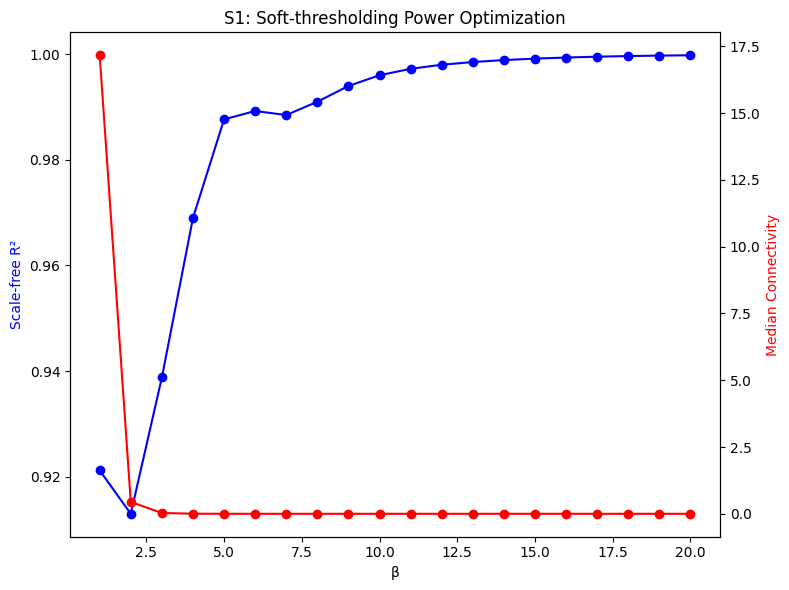

Selected β=1 (Scale-free R²=0.92)
[S1] Computing adjacency matrix with β=1...
[S1] Computing TOM...
[S1] Performing hierarchical clustering (ward) + dynamic tree cut...
..cutHeight not given, setting it to 2.317935876690555  ===>  99% of the (truncated) height range in dendro.
..done.
Detected 5 modules using dynamic tree cut. (min_cluster_size=30, deepSplit=2)
[S1] Plotting full dendrogram with branch coloring by module...


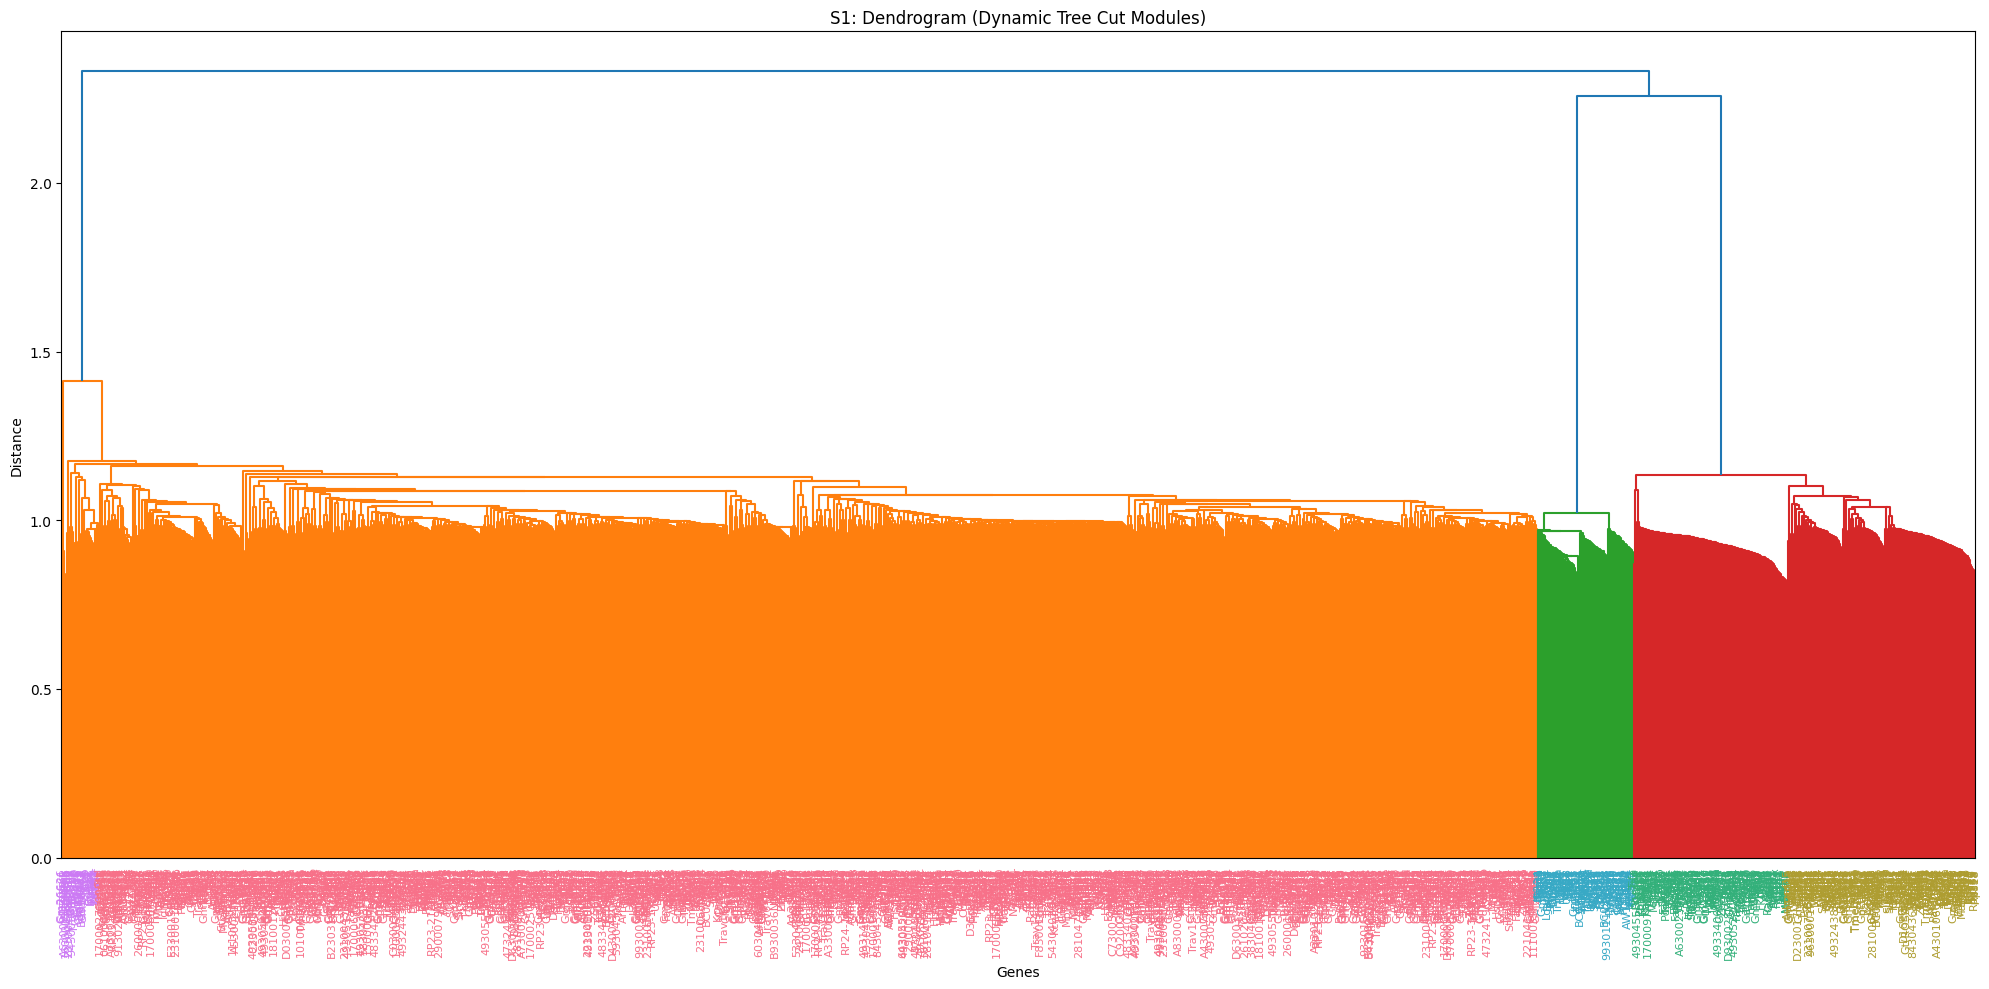

[S1] Top 5 hub genes: ['Rb1cc1', 'Cspp1', 'Ncoa2', 'Eya1', '4930444P10Rik']
[S1] Computing adjacency matrix with β=10...
[S1] Computing TOM...
[S1] Comparing TOM distributions: β=1 vs. β=10


<ipython-input-14-7c21abcbbb08>:205: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(tom_opt_vals, shade=True, label=f"TOM for β={opt_beta}")
<ipython-input-14-7c21abcbbb08>:206: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(tom_nonopt_vals, shade=True, label=f"TOM for β={nonopt_beta}")


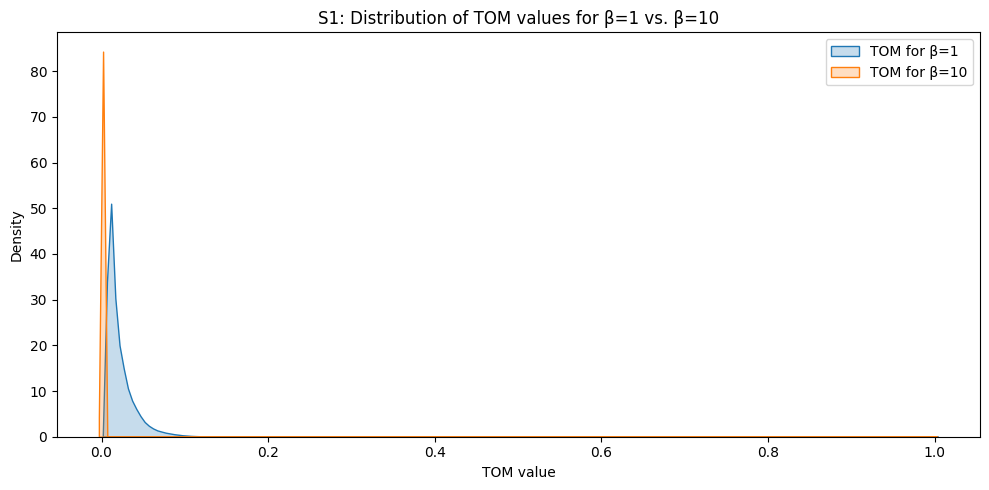

=== S1 PIPELINE COMPLETE ===

=== STARTING S2 PIPELINE ===
[S2] Data already pre-filtered; skipping filtering step.
[S2] Normalizing total counts per cell...
[S2] Applying log1p transformation...
[S2] Normalization and transformation complete.
[S2] Cleaning infinities...
[S2] Identifying top 2000 HVGs...
[S2] Computing gene-gene Pearson correlation matrix...
[S2] Optimizing soft-thresholding power (β)...
[S2] Computing adjacency matrix with β=1...
β= 1: Scale-free R²=0.92, Median connectivity=22.7
[S2] Computing adjacency matrix with β=2...
β= 2: Scale-free R²=0.89, Median connectivity=0.7
[S2] Computing adjacency matrix with β=3...
β= 3: Scale-free R²=0.93, Median connectivity=0.1
[S2] Computing adjacency matrix with β=4...
β= 4: Scale-free R²=0.96, Median connectivity=0.0
[S2] Computing adjacency matrix with β=5...
β= 5: Scale-free R²=0.98, Median connectivity=0.0
[S2] Computing adjacency matrix with β=6...
β= 6: Scale-free R²=0.99, Median connectivity=0.0
[S2] Computing adjacency ma

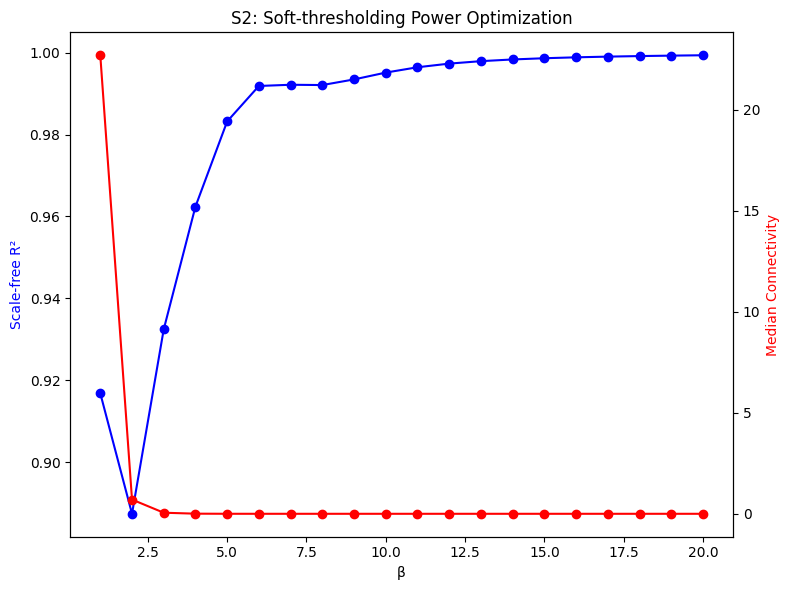

Selected β=1 (Scale-free R²=0.92)
[S2] Computing adjacency matrix with β=1...
[S2] Computing TOM...
[S2] Performing hierarchical clustering (ward) + dynamic tree cut...
..cutHeight not given, setting it to 2.624943609960884  ===>  99% of the (truncated) height range in dendro.
..done.
Detected 6 modules using dynamic tree cut. (min_cluster_size=30, deepSplit=2)
[S2] Plotting full dendrogram with branch coloring by module...


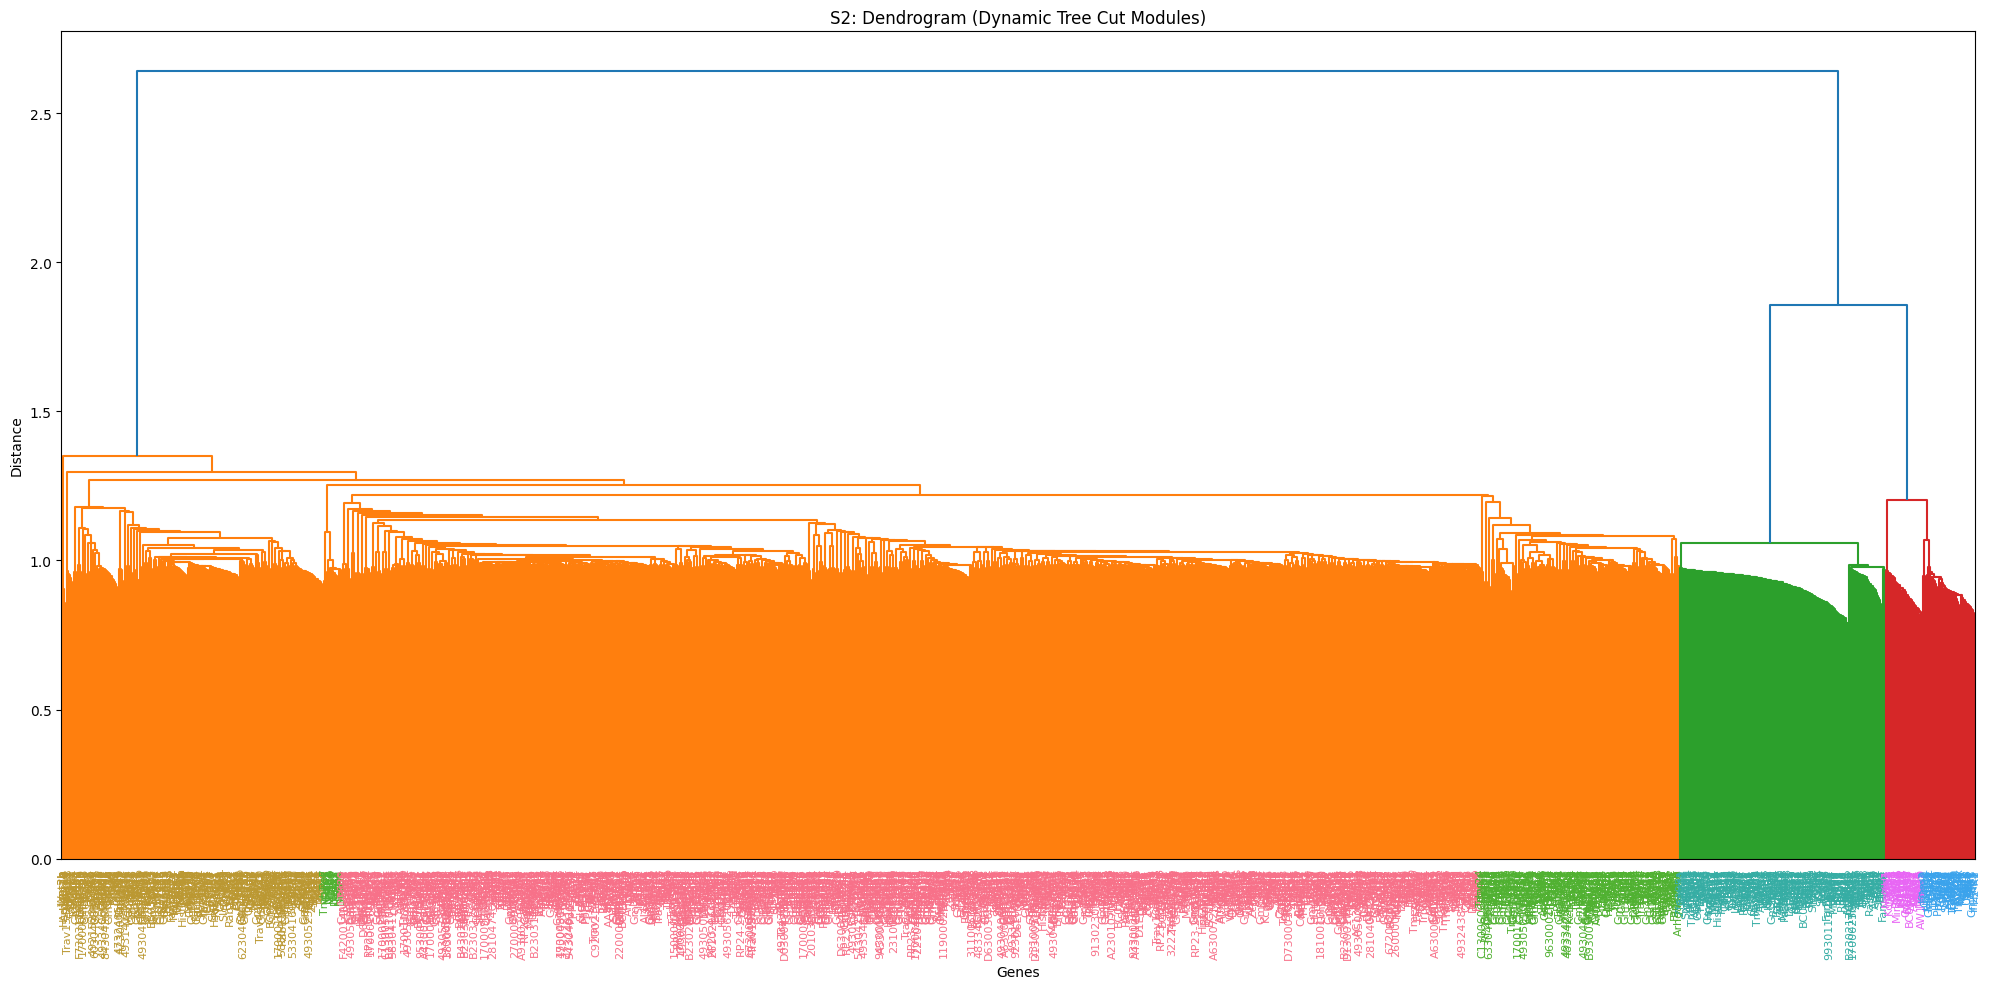

In [ ]:
import scanpy as sc
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.sparse import issparse
from scipy.spatial.distance import squareform
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.decomposition import TruncatedSVD
from scipy.stats import linregress

# Dynamic tree cutting
from dynamicTreeCut import cutreeHybrid

class WGCNAPipeline:
    def __init__(self, adata_path, analysis_name='S1'):
        """
        Initialize the pipeline with the AnnData object and an analysis name.
        """
        self.adata = sc.read_h5ad(adata_path)
        self.analysis_name = analysis_name
        self.hvg_genes = None
        self.adjacency = None
        self.TOM = None
        self.modules = None  # Will store cluster assignments for genes
        self.linkage_matrix = None
        self.beta_results = {}
        self.scale_free_r2 = {}
        self.optimal_beta = None

    def preprocess_data(self):
        print(f"[{self.analysis_name}] Data already pre-filtered; skipping filtering step.")

    def normalize_and_transform(self, target_sum=1e4):
        print(f"[{self.analysis_name}] Normalizing total counts per cell...")
        sc.pp.normalize_total(self.adata, target_sum=target_sum)

        print(f"[{self.analysis_name}] Applying log1p transformation...")
        if issparse(self.adata.X):
            self.adata.layers['log1p'] = self.adata.X.copy()
            self.adata.layers['log1p'].data = np.log1p(self.adata.layers['log1p'].data)
        else:
            self.adata.layers['log1p'] = np.log1p(self.adata.X.copy())

        # Use the log1p data for downstream analysis
        self.adata.X = self.adata.layers['log1p']
        print(f"[{self.analysis_name}] Normalization and transformation complete.")

    def clean_infinities(self):
        print(f"[{self.analysis_name}] Cleaning infinities...")
        if issparse(self.adata.X):
            self.adata.X.data = np.nan_to_num(self.adata.X.data, nan=0, posinf=0, neginf=0)
        else:
            self.adata.X = np.nan_to_num(self.adata.X, nan=0, posinf=0, neginf=0)

    def identify_hvg(self, n_top=2000):
        print(f"[{self.analysis_name}] Identifying top {n_top} HVGs...")
        sc.pp.highly_variable_genes(self.adata, n_top_genes=n_top, subset=True, flavor='seurat')
        self.hvg_genes = self.adata.var_names.copy()

    def compute_correlation_matrix(self, data):
        print(f"[{self.analysis_name}] Computing gene-gene Pearson correlation matrix...")
        if issparse(data):
            data = data.toarray()
        return np.corrcoef(data.T)

    def compute_adjacency_matrix(self, corr_matrix, power):
        print(f"[{self.analysis_name}] Computing adjacency matrix with β={power}...")
        return np.abs(corr_matrix) ** power

    def optimize_soft_threshold(self, corr_matrix, beta_range=range(1, 21)):
        print(f"[{self.analysis_name}] Optimizing soft-thresholding power (β)...")
        median_conn = []
        scale_free_r2 = []

        for beta in beta_range:
            A = self.compute_adjacency_matrix(corr_matrix, beta)
            connectivity = np.sum(A, axis=0) - 1

            # Approx. scale-free fit by log(k) vs. freq
            k = np.log(connectivity + 1)
            pk = np.exp(-k)
            slope, intercept, r_value, p_value, std_err = linregress(k, pk)
            r2 = r_value ** 2

            median_conn.append(np.median(connectivity))
            scale_free_r2.append(r2)
            self.beta_results[beta] = median_conn[-1]
            self.scale_free_r2[beta] = r2
            print(f"β={beta:2d}: Scale-free R²={r2:.2f}, Median connectivity={median_conn[-1]:.1f}")

        # Plot
        fig, ax1 = plt.subplots(figsize=(8, 6))
        ax2 = ax1.twinx()
        ax1.plot(beta_range, scale_free_r2, 'b-o', label="Scale-free R²")
        ax2.plot(beta_range, median_conn, 'r-o', label="Median Connectivity")
        ax1.set_xlabel("β")
        ax1.set_ylabel("Scale-free R²", color='b')
        ax2.set_ylabel("Median Connectivity", color='r')
        plt.title(f"{self.analysis_name}: Soft-thresholding Power Optimization")
        plt.tight_layout()
        plt.show()

        # Pick smallest β with R² >= 0.8, else max R²
        valid_betas = [b for b, r2 in zip(beta_range, scale_free_r2) if r2 >= 0.8]
        if valid_betas:
            self.optimal_beta = min(valid_betas)
        else:
            self.optimal_beta = beta_range[np.argmax(scale_free_r2)]
        print(f"Selected β={self.optimal_beta} (Scale-free R²={self.scale_free_r2[self.optimal_beta]:.2f})")
        return self.optimal_beta

    def compute_tom(self, adjacency_matrix):
        print(f"[{self.analysis_name}] Computing TOM...")
        A = np.array(adjacency_matrix, copy=True)
        np.fill_diagonal(A, 0)
        k = np.sum(A, axis=0)
        L = A @ A
        min_k = np.minimum.outer(k, k)
        TOM = (L + A) / (min_k + 1 - A + 1e-10)
        np.fill_diagonal(TOM, 1)
        return TOM

    from dynamicTreeCut import cutreeHybrid

    def perform_dynamic_tree_cut(self, tom_matrix, method='ward',
                                min_cluster_size=30, deepSplit=2):
        """
        Perform hierarchical clustering on the dissimilarity matrix (1 - TOM) using
        the specified method (e.g. 'ward'), then apply dynamic tree cut to detect modules.

        """
        print(f"[{self.analysis_name}] Performing hierarchical clustering ({method}) + dynamic tree cut...")

        # 1) Convert TOM to dissimilarity
        dissimilarity = 1 - tom_matrix
        condensed = squareform(dissimilarity, checks=False)
        linkage_matrix = linkage(condensed, method=method)

        # 2) Convert condensed distance vector back into a square matrix
        distance_matrix = squareform(condensed)  # shape: (n_genes, n_genes)

        # 3) Use dynamic tree cut
        result = cutreeHybrid(linkage_matrix,
                              distM=distance_matrix,
                              minClusterSize=min_cluster_size,
                              deepSplit=deepSplit)

        clusters = result['labels']

        n_modules = len(np.unique(clusters))
        print(f"Detected {n_modules} modules using dynamic tree cut. "
              f"(min_cluster_size={min_cluster_size}, deepSplit={deepSplit})")

        return clusters, linkage_matrix


    def plot_dendrogram(self, linkage_matrix, labels, clusters):
        """
        Plot a full dendrogram with branch coloring by dynamic tree cut modules.
        """
        print(f"[{self.analysis_name}] Plotting full dendrogram with branch coloring by module...")

        # Basic dendrogram
        plt.figure(figsize=(20, 10))
        dendro = dendrogram(
            linkage_matrix,
            labels=labels,
            leaf_rotation=90,
            leaf_font_size=8
        )
        ax = plt.gca()

        # leaf_order: the permutation of original indices in the final dendrogram
        leaf_order = dendro['leaves']
        unique_clusters = np.unique(clusters)
        palette = sns.color_palette("husl", len(unique_clusters))

        # Map each cluster to a color
        cluster_color_map = {cluster: palette[i] for i, cluster in enumerate(unique_clusters)}

        # Color the x tick labels based on dynamic tree cut cluster assignment
        xticklabels = ax.get_xticklabels()
        for xtick, leaf_idx in zip(xticklabels, leaf_order):
            cluster_id = clusters[leaf_idx]
            xtick.set_color(cluster_color_map[cluster_id])

        plt.title(f"{self.analysis_name}: Dendrogram (Dynamic Tree Cut Modules)")
        plt.xlabel("Genes")
        plt.ylabel("Distance")
        plt.tight_layout()
        plt.show()

    def compare_tom_distributions(self, tom_opt, tom_nonopt, opt_beta, nonopt_beta):
        """
        Compare the distribution of TOM values between the optimal beta and a chosen non-optimized beta.
        """
        print(f"[{self.analysis_name}] Comparing TOM distributions: β={opt_beta} vs. β={nonopt_beta}")
        # Flatten the matrices to 1D for plotting
        tom_opt_vals = tom_opt.ravel()
        tom_nonopt_vals = tom_nonopt.ravel()

        plt.figure(figsize=(10, 5))
        sns.kdeplot(tom_opt_vals, shade=True, label=f"TOM for β={opt_beta}")
        sns.kdeplot(tom_nonopt_vals, shade=True, label=f"TOM for β={nonopt_beta}")
        plt.legend()
        plt.title(f"{self.analysis_name}: Distribution of TOM values for β={opt_beta} vs. β={nonopt_beta}")
        plt.xlabel("TOM value")
        plt.ylabel("Density")
        plt.tight_layout()
        plt.show()

    def run_pipeline(self):
        print(f"=== STARTING {self.analysis_name} PIPELINE ===")
        self.preprocess_data()
        self.normalize_and_transform()
        self.clean_infinities()
        self.identify_hvg()

        # 1. Correlation
        corr_matrix = self.compute_correlation_matrix(self.adata.X)

        # 2. Soft threshold
        optimal_beta = self.optimize_soft_threshold(corr_matrix)
        adjacency = self.compute_adjacency_matrix(corr_matrix, optimal_beta)
        self.adjacency = adjacency

        # 3. TOM
        tom_opt = self.compute_tom(adjacency)
        self.TOM = tom_opt

        # 4. Dynamic Tree Cut
        clusters, linkage_matrix = self.perform_dynamic_tree_cut(
            tom_opt, method='ward',
            min_cluster_size=30,
            deepSplit=2
        )
        self.modules = clusters
        self.linkage_matrix = linkage_matrix

        # 5. Plot Dendrogram
        self.plot_dendrogram(linkage_matrix, labels=self.adata.var_names, clusters=clusters)

        # 6. Hub genes (degree centrality)
        G = nx.from_numpy_array(adjacency)
        mapping = dict(zip(range(len(self.adata.var_names)), self.adata.var_names))
        G = nx.relabel_nodes(G, mapping)
        hub_genes = sorted(nx.degree_centrality(G).items(), key=lambda x: x[1], reverse=True)[:5]
        print(f"[{self.analysis_name}] Top 5 hub genes: {[gene for gene, cent in hub_genes]}")

        # --- Compare TOM distributions with a non-optimized beta (example: β=1) ---
        nonopt_beta = 10
        adjacency_nonopt = self.compute_adjacency_matrix(corr_matrix, nonopt_beta)
        tom_nonopt = self.compute_tom(adjacency_nonopt)

        self.compare_tom_distributions(tom_opt, tom_nonopt, opt_beta=optimal_beta, nonopt_beta=nonopt_beta)

        print(f"=== {self.analysis_name} PIPELINE COMPLETE ===\n")


# Example usage:
if __name__ == '__main__':
    s1 = WGCNAPipeline("drive/MyDrive/scenario1_cd4_subset.h5ad", "S1")
    s1.run_pipeline()

    s2 = WGCNAPipeline("drive/MyDrive/scenario2_cd8_subset.h5ad", "S2")
    s2.run_pipeline()


Here is an example code framework written in OOP style, though writing in OOP style is optional.

You will need to provide two separate analyses (S1 and S2) for questions 1, 3.

1. Test different values of the soft-thresholding power β (ranging from 1 to 20) and plot the median or mean connectivity versus β. Visualize the TOM values and describe how they are influenced by the β parameter. Additionally, report the threshold selection process.


*   As β increases the scale-free topology fit (R²) also increases, while the median connectivity decreases. Here we would like to select a β with a R² > .8 (which is the case for all simulated β’s in this study). However, even though the increase of β leads to an ‘improved’ fit, we must also balance the median connectivity since a network with near 0 connectivity is useless. Thus, we threshold at a balance of fit and median connectivity.
*   Scenario 1 (CD4) : β= 1: Scale-free R²=0.92, Median connectivity=17.2

*   Scenario 2 (CD8) : β= 1: Scale-free R²=0.92, Median connectivity=22.7

*   Plots of the distributions of TOM value by Density with two different Beta values located above in code output


2. What does the clustering coefficient represent in a gene co-expression network? (Reference: https://bmcbioinformatics.biomedcentral.com/articles/10.1186/1471-2105-9-559)

- In a gene co-expression network, each node is a gene, and edges indicate co-expression. The local clustering coefficient of a node is the fraction of pairs of neighbors of that node that are also neighbors with each other. In layman's terms, the clustering coefficient of a gene roughly indicates how “clique-ish” its local neighborhood is.

3. Get the top 5 hub genes using the compute_hub_genes method. Discuss potential criteria for selecting hub genes when module structures are highly fragmented.

- Top 5 hub genes: ['Rb1cc1', 'Cspp1', 'Ncoa2', 'Eya1', '4930444P10Rik']
- Top 5 hub genes: ['Rb1cc1', 'Sgk3', 'Ncoa2', 'Gm5415', 'Dst']
- Selecting hub genes when module structures are highly fragmented is challenginng because a gene might have modest global degree but be a “hub” within its own small module. We might increase the minClusterSize or lower the deepSplit parameter in dynamic tree cutting to avoid overly fragmented modules. Or maybe compute intramodular connectivity or centrality within each module, rather than using the entire network’s adjacency


4. If fewer than 5 valid modules exist, discuss possible reasons why module detection failed and propose adjustments.

- We detected 5 modules for S1 and 6 modules for S2 using dynamic tree cutting